In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 

# reading in json files, converting to pandas dataframes, and concatenating them
path_to = '/home/arrowboy/Documents/School/Spring2024/Stat415/project/Spotify Account Data/StreamingHistory_music_'
dfs = []
for i in range(0, 7):
    with open(path_to + str(i) + '.json') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

# filtering out songs that were played for less than 15 seconds
df = df[df['msPlayed'] > 15000]

# num obs
df.shape[0]

32846

354
350


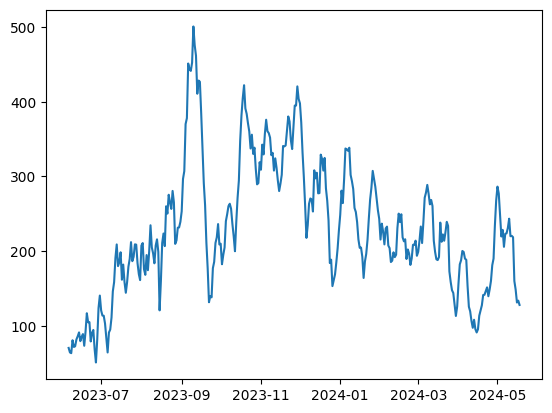

In [10]:
# splitinng end time into date and time
df['endTime'] = pd.to_datetime(df['endTime'])
df['date'] = df['endTime'].dt.date
df['time'] = df['endTime'].dt.time

# making new empty df where every day is an observation from 5/31/23 to 5/18/24
start_date = pd.to_datetime('2023-05-31')
end_date = pd.to_datetime('2024-05-18')

date_range = pd.date_range(start_date, end_date)
date_df = pd.DataFrame(date_range, columns=['date'])

# getting the number of minutes listened to each day
min_listen = df.groupby('date')['msPlayed'].sum() / 60000
min_listen = min_listen.reset_index()
min_listen.columns = ['date', 'minutes_listened']

# check if 2 dfs are the same
print(date_df.shape[0])
print(min_listen.shape[0]) # 4 days are missing

# merge the two dfs 
# put 0 mins listened for the days that are missing
# turning to matching var types to merge
date_df['date'] = pd.to_datetime(date_df['date'])
min_listen['date'] = pd.to_datetime(min_listen['date'])
date_df = pd.merge(date_df, min_listen, on='date', how='left')

date_df['minutes_listened'] = date_df['minutes_listened'].fillna(0)

# getting the number of songs listened to each day
num_songs = df.groupby('date').size()
num_songs = num_songs.reset_index()
num_songs.columns = ['date', 'num_songs']

# merge the two dfs
# put 0 songs listened for the days that are missing
# turning to matching var types to merge
date_df['date'] = pd.to_datetime(date_df['date'])
num_songs['date'] = pd.to_datetime(num_songs['date'])
date_df = pd.merge(date_df, num_songs, on='date', how='left')

date_df['num_songs'] = date_df['num_songs'].fillna(0)

# saving the data
date_df.to_csv('spot_day_data.csv', index=False)

# 7 day moving average of minutes listened
date_df['7_day_avg'] = date_df['minutes_listened'].rolling(window=7).mean()
#plotting
plt.plot(date_df['date'], date_df['7_day_avg'])


TypeError: index type not supported

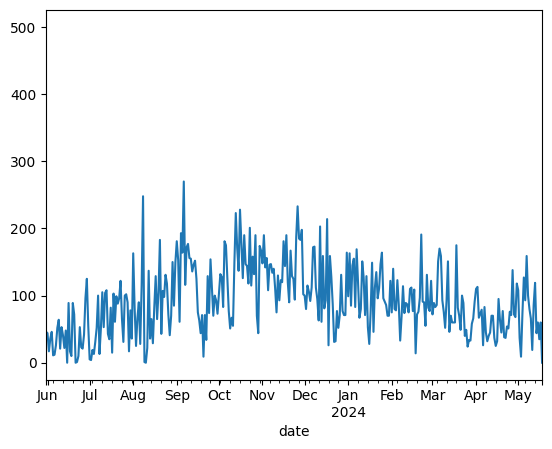

In [9]:
#date_df['minutes_listened'].groupby(date_df['date']).sum().plot()
date_df['num_songs'].groupby(date_df['date']).sum().plot()

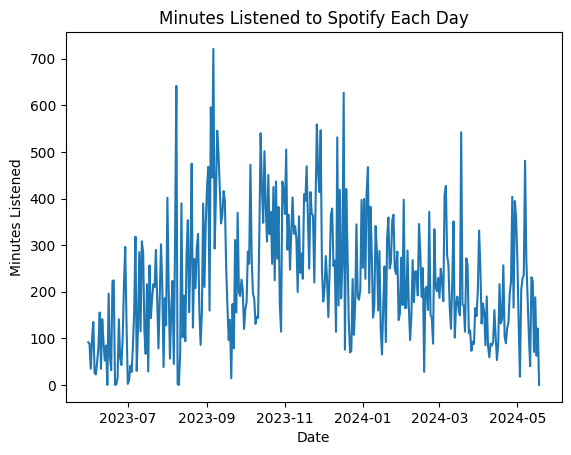

In [5]:
# getting the number of minutes listened to each day plot
plt.plot(date_df['date'], date_df['minutes_listened'])
plt.xlabel('Date')
plt.ylabel('Minutes Listened')
plt.title('Minutes Listened to Spotify Each Day')
plt.show()


<Axes: xlabel='date'>

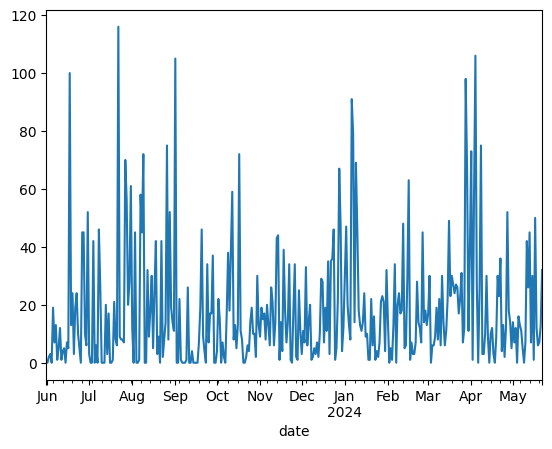

In [11]:
# repeating same process for 1 more additional datasetr
with open('/home/arrowboy/Documents/School/Spring2024/Stat415/project/Spotify Account Data/julius_streaming.json') as f:
    data = json.load(f)

jul_df = pd.DataFrame(data)

jul_df = jul_df[jul_df['msPlayed'] > 15000]

jul_df['endTime'] = pd.to_datetime(jul_df['endTime'])
jul_df['date'] = jul_df['endTime'].dt.date
jul_df['time'] = jul_df['endTime'].dt.time

jul_num_songs = jul_df.groupby('date').size()
jul_num_songs = jul_num_songs.reset_index()
jul_num_songs.columns = ['date', 'num_songs']

jul_date_range = pd.date_range(jul_df['date'].min(), jul_df['date'].max())
jul_date_df = pd.DataFrame(jul_date_range, columns=['date'])


jul_date_df['date'] = pd.to_datetime(jul_date_df['date'])
jul_num_songs['date'] = pd.to_datetime(jul_num_songs['date'])
jul_date_df = pd.merge(jul_date_df, jul_num_songs, on='date', how='left')
jul_date_df['num_songs'] = jul_date_df['num_songs'].fillna(0)

# making new plot with 7 day rolling average on different plot
# average minutes listened per "week"
jul_date_df['num_songs'].groupby(jul_date_df['date']).sum().plot()
